In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
df=pd.read_csv("/content/winequality-red.csv")


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df= df.sample(frac = 1)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1503,6.2,0.440,0.39,2.5,0.077,6.0,14.0,0.99555,3.51,0.69,11.0,6
423,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0,7
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1383,8.0,0.600,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9,5


In [7]:
df.shape

(1599, 12)

In [8]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1503            6.2             0.440         0.39             2.5      0.077   
423            10.5             0.240         0.47             2.1      0.066   
557            15.6             0.645         0.49             4.2      0.095   
1589            6.6             0.725         0.20             7.8      0.073   
1383            8.0             0.600         0.22             2.1      0.080   
...             ...               ...          ...             ...        ...   
769             7.9             0.720         0.01             1.9      0.076   
324            10.0             0.490         0.20            11.0      0.071   
743            11.6             0.410         0.58             2.8      0.096   
886             9.0             0.800         0.12             2.4      0.083   
706             7.0             0.780         0.08             2.0      0.093

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<ipython-input-54-d3a19b159d9b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.pH)


<Axes: xlabel='pH', ylabel='Density'>

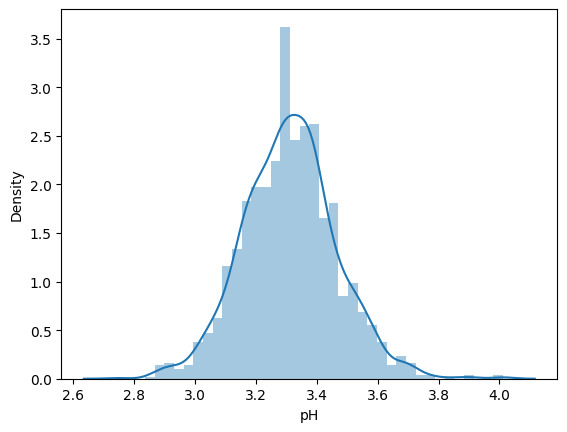

In [54]:
sns.distplot(df.pH)

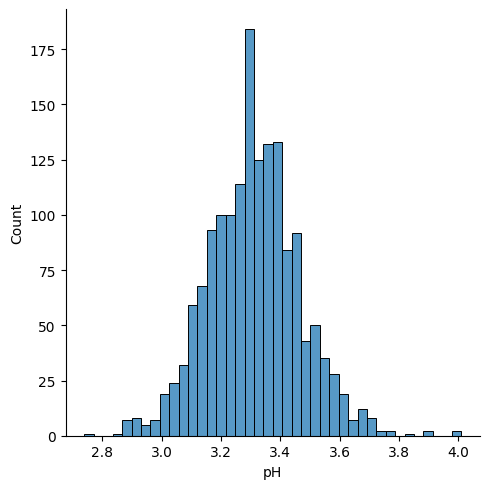

In [55]:
sns.displot(df.pH)

<Axes: xlabel='pH', ylabel='density'>

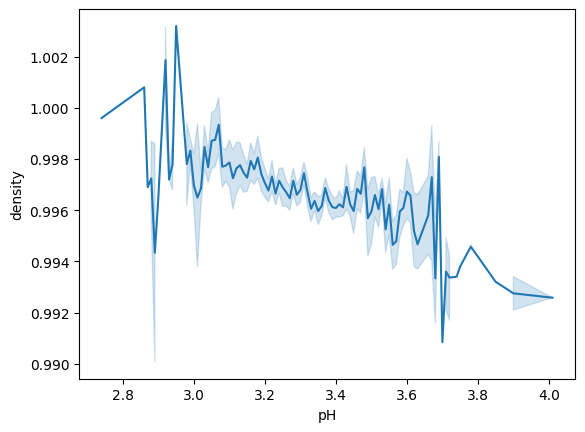

In [56]:
sns.lineplot(x=df['pH'],y=df['density'])

<Axes: xlabel='pH', ylabel='density'>

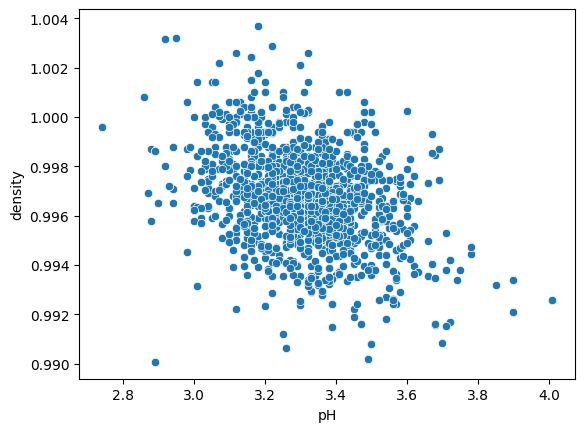

In [57]:
sns.scatterplot(x=df['pH'],y=df['density'])

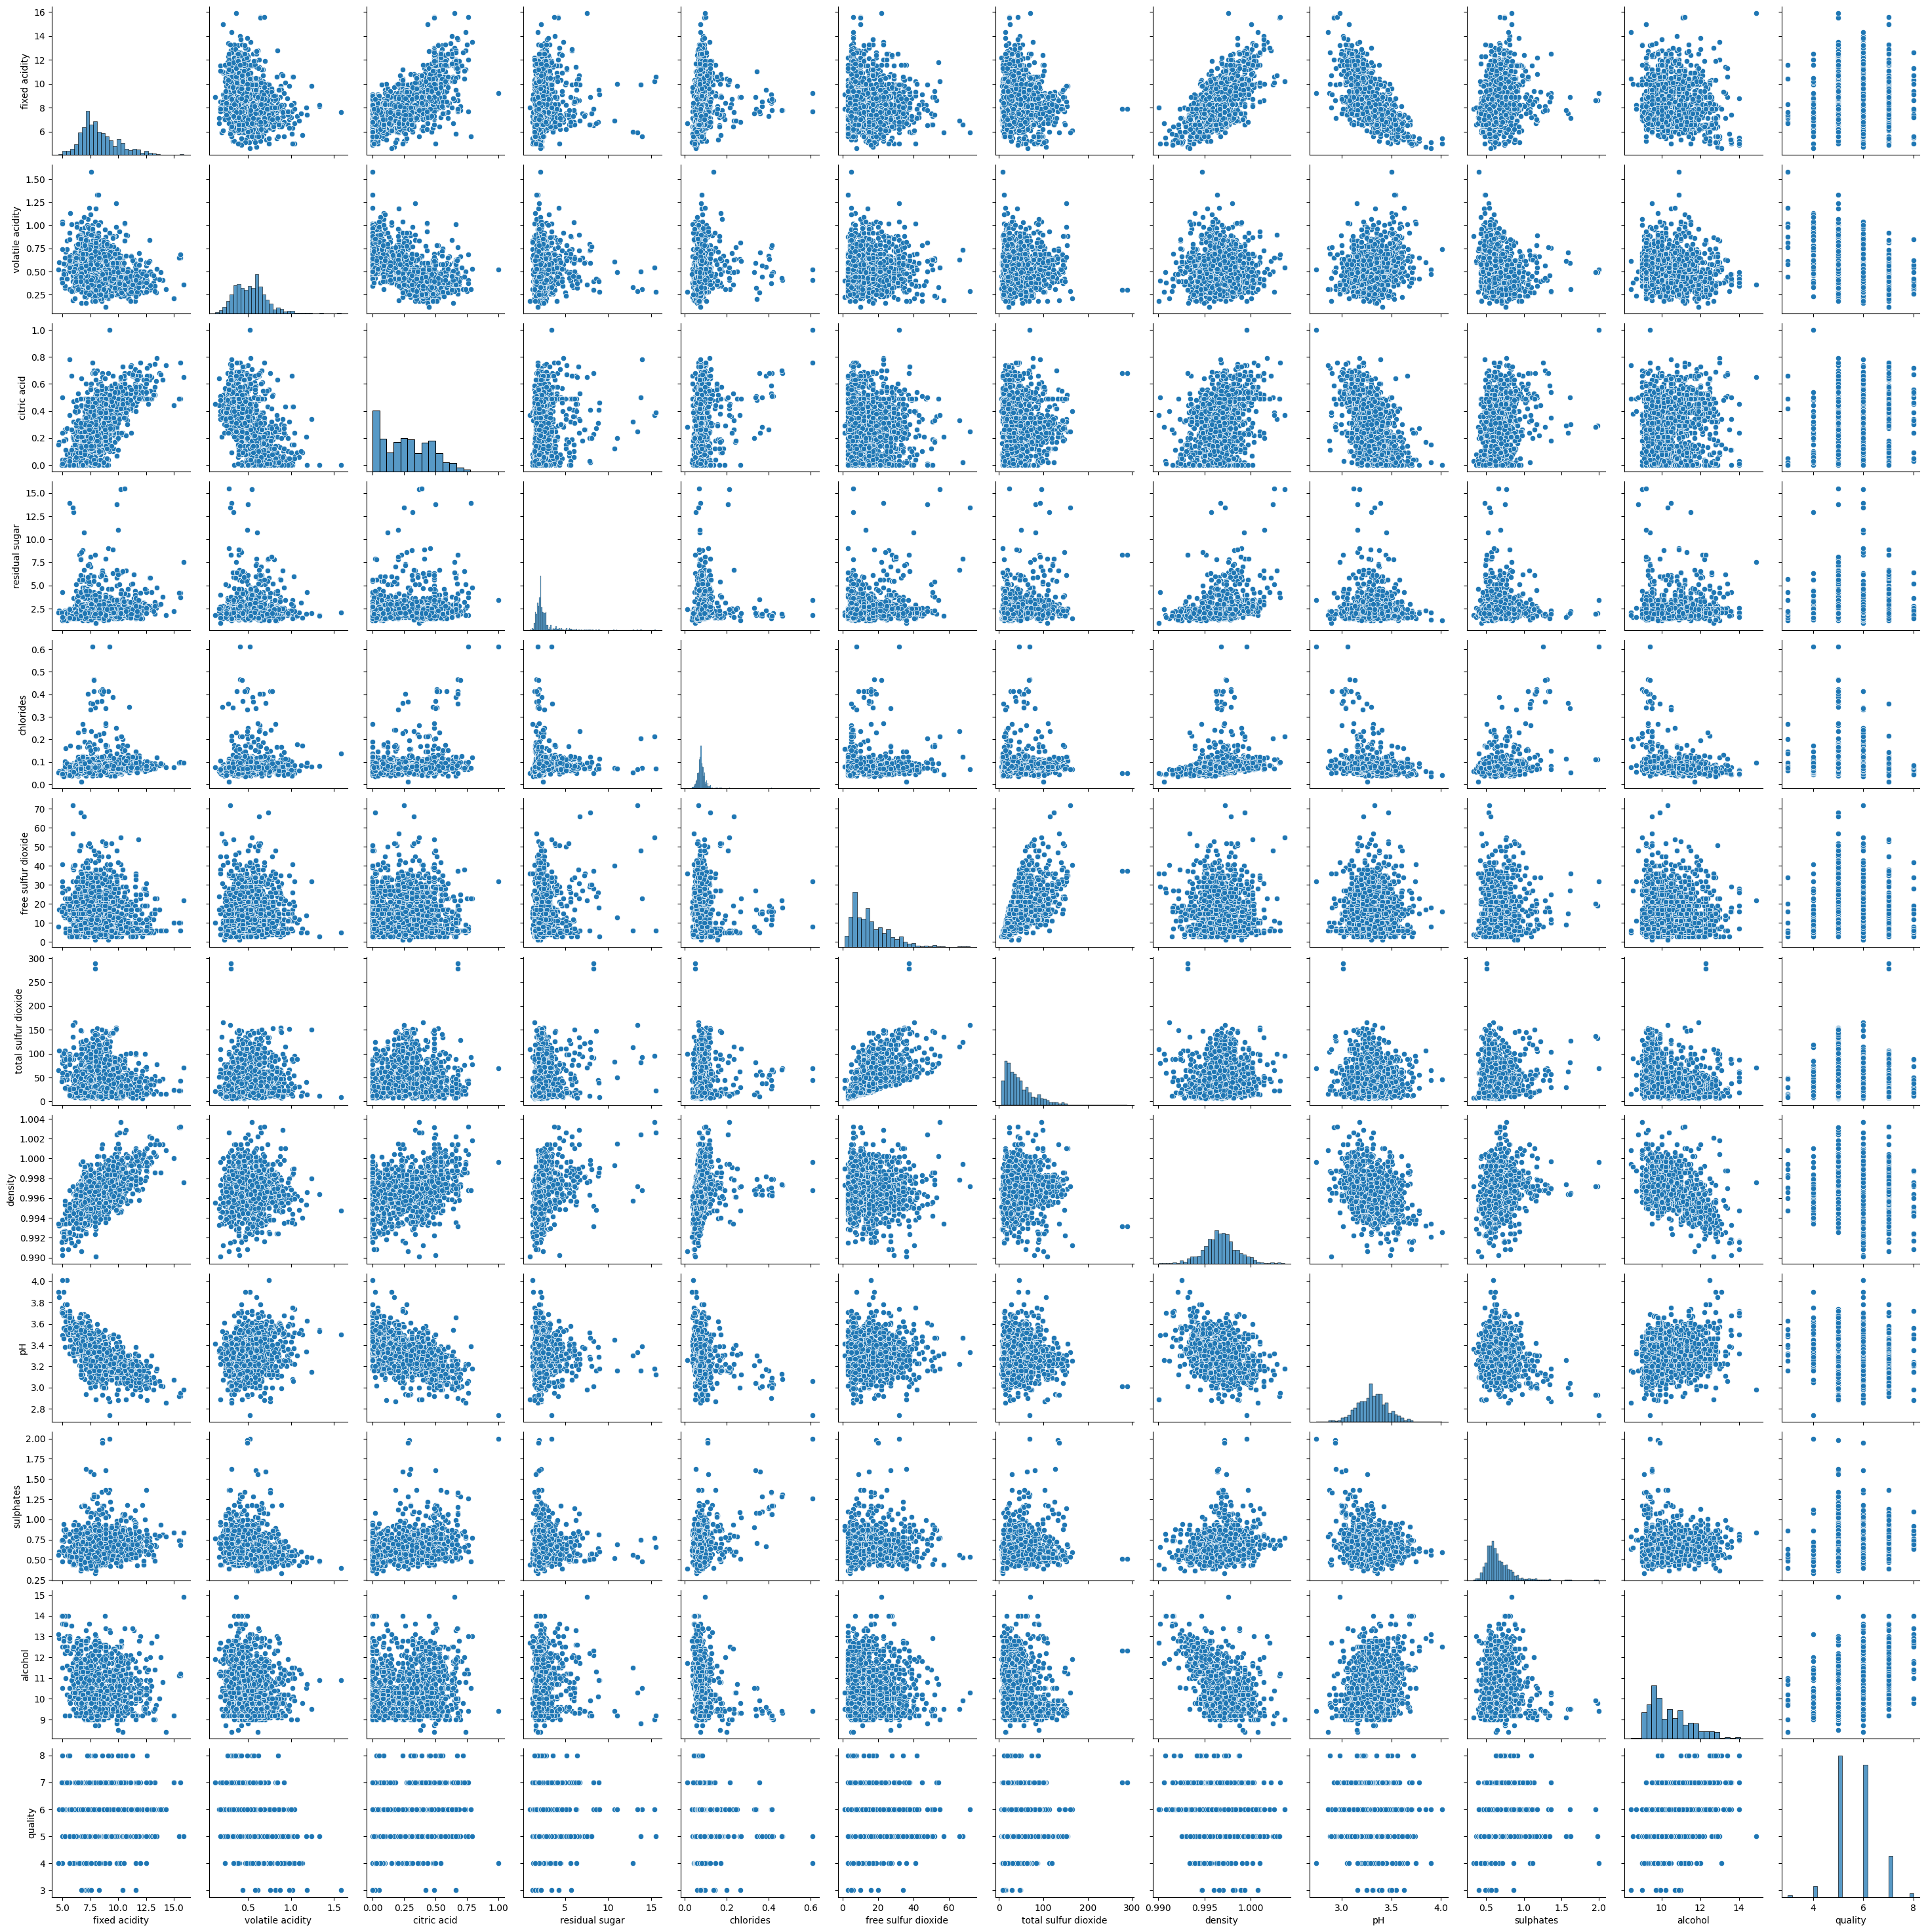

In [58]:
sns.pairplot(df)

<Axes: >

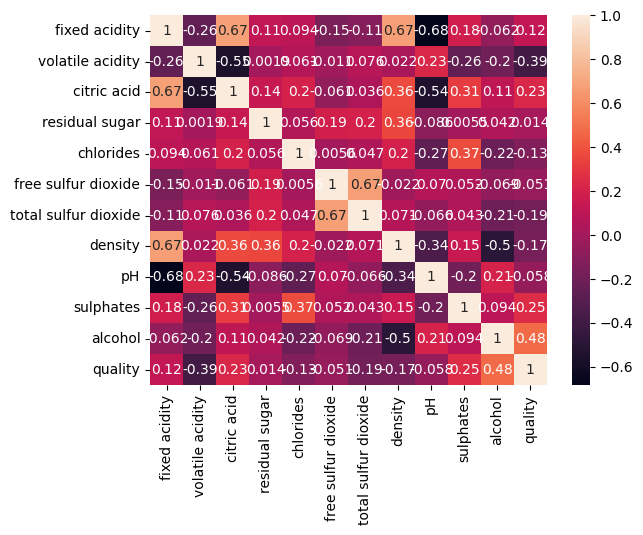

In [12]:
import seaborn as sns
sns.heatmap(df.corr(),annot =True)

<Axes: >

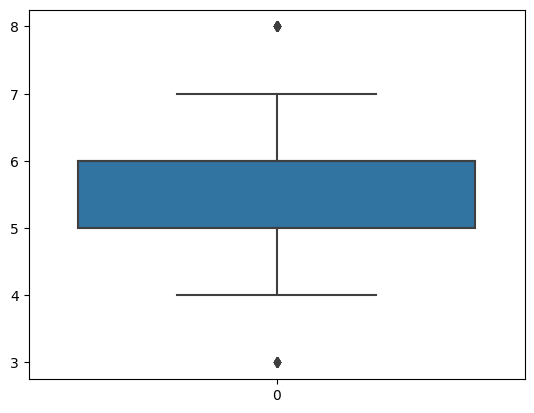

In [13]:
sns.boxplot(df.quality)

TEST TRAIN SPLIT


In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1503,6.2,0.440,0.39,2.5,0.077,6.0,14.0,0.99555,3.51,0.69,11.0,6
423,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0,7
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1383,8.0,0.600,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9,5


In [15]:
y=df.quality


In [16]:
y

1503    6
423     7
557     5
1589    5
1383    5
       ..
769     5
324     6
743     5
886     6
706     5
Name: quality, Length: 1599, dtype: int64

In [17]:
x=df.drop(columns=['quality'],axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1503,6.2,0.440,0.39,2.5,0.077,6.0,14.0,0.99555,3.51,0.69,11.0
423,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2
1383,8.0,0.600,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9


In [18]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
x=pd.DataFrame(scale.fit_transform(x),columns =x.columns)

In [19]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.141593,0.219178,0.39,0.109589,0.108514,0.070423,0.028269,0.402349,0.606299,0.215569,0.400000
1,0.522124,0.082192,0.47,0.082192,0.090150,0.070423,0.063604,0.567548,0.322835,0.341317,0.400000
2,0.973451,0.359589,0.49,0.226027,0.138564,0.126761,0.060071,0.960352,0.141732,0.245509,0.415385
3,0.176991,0.414384,0.20,0.472603,0.101836,0.394366,0.257951,0.560206,0.433071,0.125749,0.123077
4,0.300885,0.328767,0.22,0.082192,0.113523,0.338028,0.349823,0.444934,0.440945,0.095808,0.230769


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =0)

In [21]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
642,0.212389,0.191781,0.32,0.184932,0.081803,0.112676,0.081272,0.300294,0.425197,0.095808,0.446154
679,0.548673,0.116438,0.42,0.047945,0.120200,0.253521,0.074205,0.395007,0.425197,0.239521,0.538462
473,0.433628,0.421233,0.10,0.082192,0.111853,0.070423,0.088339,0.626285,0.385827,0.137725,0.261538
390,0.504425,0.102740,0.56,0.034247,0.058431,0.028169,0.007067,0.340675,0.330709,0.107784,0.523077
1096,0.256637,0.349315,0.27,0.075342,0.118531,0.225352,0.300353,0.447137,0.409449,0.149701,0.215385


In [22]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.522124,0.267123,0.64,0.102740,0.158598,0.070423,0.031802,0.530837,0.275591,0.197605,0.523077
1032,0.398230,0.116438,0.33,0.078767,0.085142,0.169014,0.074205,0.373715,0.409449,0.305389,0.507692
1002,0.247788,0.729452,0.00,0.229452,0.141903,0.056338,0.028269,0.479442,0.700787,0.125749,0.353846
487,0.230088,0.280822,0.13,0.075342,0.076795,0.239437,0.056537,0.415565,0.370079,0.209581,0.230769
979,0.469027,0.253425,0.58,0.178082,0.136895,0.112676,0.130742,0.758443,0.433071,0.149701,0.092308


LINEAR REGRESSION MODEL


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
y_predict=lr.predict(x_test)

In [26]:
y_predict1=lr.predict(x_train)

In [27]:
y_predict

array([6.15012049, 6.5573309 , 4.90896669, 5.68981421, 5.1071163 ,
       5.87287677, 5.63287322, 5.1422087 , 5.8247356 , 5.38425894,
       5.39189091, 6.38486314, 5.4769127 , 5.5655203 , 5.13871669,
       5.30052831, 5.74926088, 4.79787259, 5.84046197, 5.20977815,
       6.23349095, 6.35904703, 6.33638474, 5.05787425, 5.39213836,
       5.62389844, 5.19456649, 6.66063347, 5.71311846, 5.03277115,
       5.64620438, 5.34205213, 5.71079598, 5.98475964, 5.92975344,
       5.57832356, 5.9160273 , 5.71666076, 5.65516005, 6.47498965,
       5.60920239, 5.92276363, 5.28142823, 6.60723099, 5.24895136,
       6.15012049, 5.42280428, 5.05179522, 5.90156614, 5.01135165,
       5.1613042 , 6.00191652, 6.06245135, 6.2975011 , 5.7902273 ,
       5.8692084 , 5.70894946, 6.36329453, 6.39626814, 5.11416485,
       5.04127665, 5.88006328, 5.68863944, 5.25934349, 5.64374603,
       5.1380514 , 5.39189091, 5.58292754, 6.23427628, 5.01449162,
       5.4902445 , 5.42699934, 5.8692084 , 5.04145215, 5.34148

In [28]:
quality =pd.DataFrame({'Actual_quality':y_test,'Predicted_quality':y_predict})
quality

,Actual_quality,Predicted_quality
514,7,6.150120
1006,7,6.557331
690,3,4.908967
1532,6,5.689814
593,5,5.107116
...,...,...
1515,6,4.847998
372,6,6.311439
501,7,6.405162
572,5,6.009098


In [29]:

from sklearn import metrics
print(metrics.r2_score(y_test,y_predict))

0.3617997705988416


In [30]:

from sklearn import metrics
print(metrics.r2_score(y_train,y_predict1))

0.35880501597473635


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [33]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
lr_pred=lr.predict(x_test)

In [37]:

from sklearn import metrics
print(metrics.r2_score(y_test,lr_pred))
accuracy_score(y_test,lr_pred)

0.21632653061224494


0.596875

DESICISION TREE


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model_dc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [42]:
model_dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
dc_y_pred=model_dc.predict(x_test)

In [44]:
dc_y_pred_train=model_dc.predict(x_train)

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
accuracy_score(y_test,dc_y_pred)

0.578125

In [47]:
accuracy_score(y_train,dc_y_pred_train)

0.6247068021892104

RANDOM FOREST MODEL


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier(criterion='entropy')

In [49]:
rf_model.fit(x_train,y_train)



RandomForestClassifier(criterion='entropy')

In [50]:
rf_pred=rf_model.predict(x_test)
rf_pred1=rf_model.predict(x_train)




In [51]:
accuracy_score(y_test,rf_pred)

0.703125

In [52]:
accuracy_score(y_train,rf_pred1)

1.0

In [53]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.71      0.79      0.75       121
           6       0.70      0.75      0.72       141
           7       0.69      0.54      0.60        41
           8       1.00      0.33      0.50         3

    accuracy                           0.70       320
   macro avg       0.52      0.40      0.43       320
weighted avg       0.67      0.70      0.68       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
